### **Quora Duplicate Questions  Pairs**

**Dataset source:**

https://www.kaggle.com/c/quora-question-pairs


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(404290, 6)

In [8]:
# is_duplicate = 0 means that the two questions are not duplicate

df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
69197,69197,119434,119435,How do you download AoE 3?,Where is submarine AE1?,0
338747,338747,47712,291521,What is the most common reason people start sm...,Why do I want to start smoking?,1
29283,29283,54197,54198,What work can a person with physical limitatio...,"I want to be a nurse, but I really don't like ...",0
225582,225582,333951,333952,As students in unvrsity campus town what kind ...,What are some good topics for making a magazine?,0
225193,225193,333483,333484,"In Indonesia, what is the outlook for property...",Can I go braless in Indonesia (Jakarta)?,0
272055,272055,111248,267770,How should one deal with depression?,How do I deal with this depression of mine?,1
339943,339943,244750,48722,What was the importance of the Battle of Somme?,What is the significance of the Battle of the ...,1
372503,372503,503229,503230,Is there a site that tells you where a song ha...,What are some songs/bands you used to like ear...,0
131218,131218,210435,210436,Is time linear so that the cosmos even had a b...,Is time inherently linear or nonlinear?,0
324862,324862,17954,42486,What does surgical strike mean?,What is a surgical strike?,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404290 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [12]:
# Checking if any row data is repeated or not (i.e. if any two rows have same data or not) and we see no rows are duplicated

df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


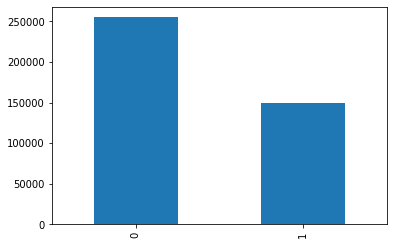

In [20]:
# Out of total data point how many are duplicate and how many have unique questions in question1 and question2 columns 
# (i.e. count of each class - is_duplicates = 0 and 1)

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

# We notice class imbalance here - 63% vs 36%


In [23]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())       # Merging Ques 1 and Ques 2 in each row 
print('Number of unique questions', np.unique(qid).shape[0])

x = qid.value_counts()>1
print('Number of questions that are getting repeated', x[x].shape[0])     # i.e out of 8 Lakh total questions (ques1 column has 4L questions and ques2 column has 4L questions) how many questions are getting repeated

Number of unique questions 537933
Number of questions that are getting repeated 111780


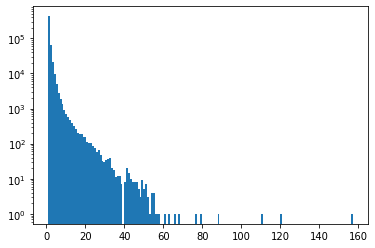

In [24]:
# Repeated questions histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()